<a href="https://colab.research.google.com/github/10510317/Education_in_India/blob/master/CA_TWO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Data Visualization CA Two (Group-D)
#       * Education in India*

## Laxman Thakur               - 10393065
## Ravjeet Singh Dari          - 10510317
## Jamadaguntla Swetha   - 10505288
## Satyajit Saha                    - 10505118

## To upload the csv file




In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving school_state.csv to school_state (1).csv


## To import pandas library

In [0]:
import pandas as pd

## To import io library

In [0]:
import io

## To import numpy library

In [0]:
import numpy as np

## To import matplotlib library

In [0]:
import matplotlib.pyplot as plt

## To import altair library

In [0]:
import altair as alt

## To import seaborn library

In [0]:
import seaborn as sns

## To import Axes3D library

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

In [0]:
pip install plotly

In [0]:
pip install chart-studio 

## To import plotly.graph_objs library

In [0]:
import plotly.graph_objs as go

## To import init_notebook_mode and iplot library

In [0]:
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)


## To import scipy library

In [0]:
import scipy as sp

## To  read csv file

In [0]:

df2 = pd.read_csv(io.BytesIO(uploaded['school_state.csv']))

##  For top 6 rows of dataset

In [0]:
df2.head()

,State_Code,State_Name,Area_SqKm,Total_Population,Rural_Population,Urban_Population,Growth_Rate,Sex_Ratio,Literacy_Rate,Male_Literacy,Female_Literacy,Number_of_Districts,Villages,Number_of_Schools,Enrollment_in_Schools,Enrollment_Rural_Schools,Enrollment_Urban_Schools,Number_of_Teachers,Teachers_Rural_Schools,Teachers_Urban_Schools,Schools_Single_Classroom,Single_Teacher_School,Girls_School,Boys_School,Co-Education_School,Schools_with_Ramps,Library,Librarian,CWSN_School,Lab_Assistant,Boys_Hostel,Girls_Hostel,Schools_Internet,Schools_ICT_Lab,Playground,Medical_Checkup,SMDC,PTA,Classrooms,Female_Teachers,Phyiscs_Lab,Chemistry_Lab,Biology_Lab,Computer_Lab,Maths_Lab,Language_Lab,Geography_Lab,Psychology_Lab,Social_Science_Lab,Female_Professional_Teacher,Male_Professional_Teacher,Male_Regular_Teacher,Female_Regular_Teacher,Male_Contract_Teacher,Feamle_Contract_Teacher,Girls_Enrollment,Boys_Enrollment,Boys_Repeaters,Girls_Repeaters,Boys_CWSN,Girls_CWSN,Arts_Students,Science_Students,Commerce_Students,Vocational_Students,Other_Students
0,1,Jammu And Kashmir,222236,12548.93,12528.88,20.05,23.71,883,68.74,78.26,58.01,22,7263,4202,584967,386265,198702,31275,20961,10314,67,0,180,97,3925,1104,3740,705,24,1402,59,46,823,696,3235,2612,3462,3559,18287,12977,533,535,505,506,97,52,52,18,25,12977,18298,18232,12948,66,29,270721,417780,10142,7393,3072,2495,139298,89024,14923,381,503
1,2,Himachal Pradesh,55673,6856.51,6847.82,8.69,12.81,974,83.78,90.83,76.60,12,10120,3782,482494,400143,82351,30545,26134,4411,113,0,54,26,3702,1913,3748,785,16,1873,77,64,1980,1940,3590,3540,2357,628,17259,13343,521,527,518,799,151,53,89,10,31,13343,17202,16704,13032,498,311,225509,321164,14690,9792,2531,1857,122284,69201,34724,386,0
2,3,Punjab,50362,27704.24,27674.42,29.82,13.73,893,76.68,81.48,71.34,22,13195,9171,1578960,871014,707946,81117,47858,33259,132,12,378,133,8660,1674,9012,1895,30,2773,104,115,7742,4857,8935,6801,4380,4508,47643,55630,1558,1584,1473,2120,1080,458,257,73,266,55630,25487,25413,55464,74,166,692167,1151725,21738,9038,9803,10887,418949,151189,95230,25137,940
3,4,Chandigarh,114,1054.69,978.03,76.66,17.10,818,86.43,90.54,81.38,1,84,160,80160,6166,73994,3951,329,3622,1,0,3,1,156,80,160,77,1,90,7,7,156,71,155,159,85,45,1805,3076,65,64,60,68,50,28,21,8,28,3076,875,872,3067,3,9,34738,57229,1818,711,1231,851,15328,10156,7842,3032,0
4,5,Uttarakhand,53483,10116.75,10095.21,21.54,19.17,963,79.63,88.33,70.70,13,11989,3512,697294,508211,187683,35391,29824,5536,46,23,259,108,3145,492,3198,445,28,83,128,80,1293,501,2082,2610,2533,2610,18270,11078,773,766,727,906,297,133,217,54,157,11078,24313,23195,10255,1118,823,337500,461394,25217,18825,1482,1298,162764,102081,20447,126,1096


In [0]:
labels = df2['State_Name'].values
values = df2['Literacy_Rate'].values

trace = go.Pie(labels=labels, values=values)
layout = go.Layout(title='state vs literacy ')
fig = go.Figure(data=[trace], layout=layout)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
		
configure_plotly_browser_state()
iplot(fig)


In [0]:
interval = alt.selection_interval()
base=alt.Chart(df2,title="Girls and Boys Enrollment").mark_point().encode(
y='Enrollment_in_Schools',
color=alt.condition(interval,'State_Name', alt.value('lightgray'))
).properties(
selection=interval
).interactive()
base.encode(x='Girls_Enrollment').interactive() | base.encode(x='Boys_Enrollment').interactive()

alt.HConcatChart(...)

In [0]:
pts = alt.selection(type="interval", encodings=["x"])

# left panel: scatter plot
points = alt.Chart().mark_point(filled=True, color="black").encode(
    x='Number_of_Schools',
    y='State_Name'
).transform_filter(
    pts
).properties(
    width=500,
    height=300
).interactive()

# right panel: histogram
mag = alt.Chart().mark_bar().encode(
    x='Total_Population',
    y="count()",
    color=alt.condition(pts, alt.value("red"), alt.value("lightgray"))
).properties(
    width=300,
    height=300
).add_selection(pts)

# build the chart:
alt.hconcat(
    points,
    mag,
    data=df2,
    title="Number_of_schools in statewise varying with population"
).transform_bin(
    "Total_Population",
    field="Total_Population",
    bin=alt.Bin(maxbins=20)
)


alt.HConcatChart(...)

In [0]:
source = df2

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='State_Name:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Number_of_Schools', 'Number_of_Teachers', 'Literacy_Rate'],
    column=['Literacy_Rate', 'Number_of_Teachers', 'Number_of_Schools']
).interactive()


alt.RepeatChart(...)

In [0]:
x0 = df2['Male_Literacy'].values
x1 = df2['Female_Literacy'].values

trace1 = go.Histogram(
    x=x0,
    name='Male',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='Female',
    opacity=0.75
)
data = [trace1, trace2]
layout = go.Layout(title='literacy rate difference between males and females students',
    xaxis=dict(
	        title='count'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    barmode='stack')
fig = go.Figure(data=data, layout=layout)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()
iplot(fig)


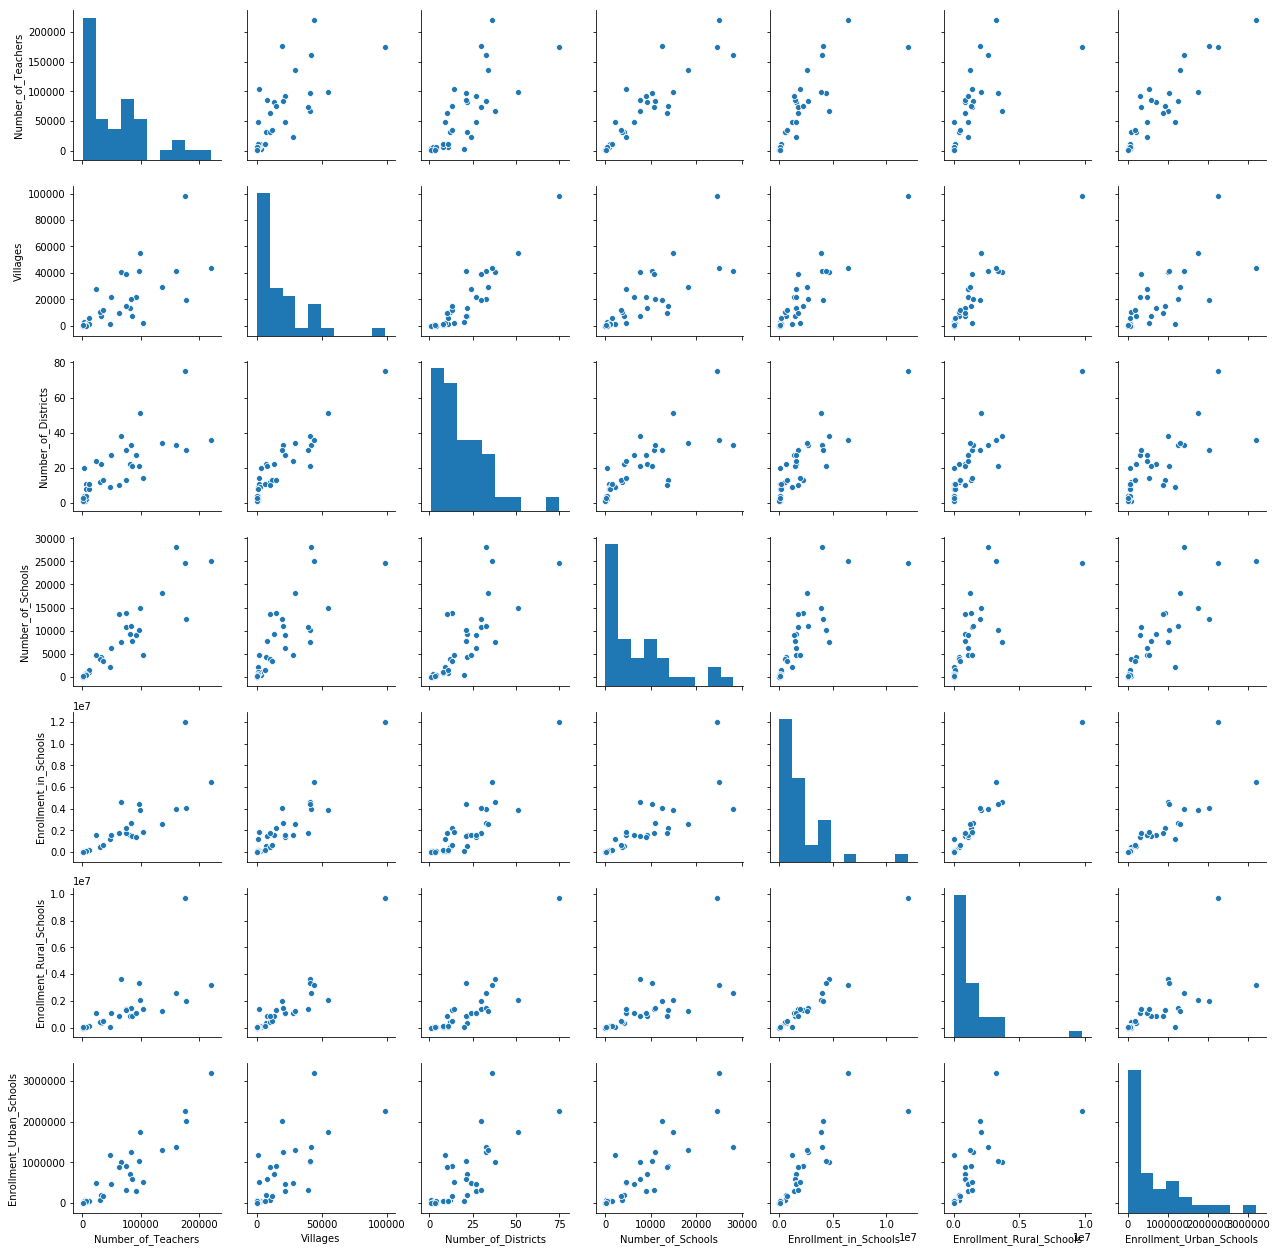

In [0]:
sns.pairplot(df2,vars=['Number_of_Teachers','Villages','Number_of_Districts','Number_of_Schools','Enrollment_in_Schools','Enrollment_Rural_Schools','Enrollment_Urban_Schools'])


In [0]:
alt.Chart(df2, title="Number of Teachers vs Number of Schools").mark_point().encode(
x='Number_of_Teachers',
y='Number_of_Schools',
color='State_Name'
).interactive()

alt.Chart(...)

In [0]:
df2['School_Facilities'] = df2['Schools_with_Ramps']+df2['Playground']+df2['Schools_Internet']+df2['Schools_ICT_Lab']+df2['Medical_Checkup']

alt.Chart(
    df2,
    title="Statewise School_Facilities"
).mark_rect().encode(
    x='Co-Education_School',
    y='State_Name',
    color=alt.Color('School_Facilities', scale=alt.Scale(scheme="inferno")),
    tooltip=[
        alt.Tooltip('Co-Education_School', title='Co-Education_School'),
        alt.Tooltip('School_Facilities', title='School_Facilities')
    ]
).properties(width=550).interactive()



alt.Chart(...)

In [0]:
alt.Chart(df2).mark_bar().encode(
  x='Schools_Internet',
  y='State_Name',
   color = 'State_Name'
).properties(
   title = 'Internet School'
).interactive()

alt.Chart(...)

In [0]:
alt.Chart(df2,
      title="Library vs Librarian"
     ).mark_area(
    color="lightblue",
    interpolate='step-after',
    line=True
).encode(
    x='Library',
    y='Librarian'
).interactive()


alt.Chart(...)

In [0]:
alt.Chart(df2,title="Children With Special Needs School").mark_bar().encode(
x= 'CWSN_School',
y= 'State_Name',
color= 'State_Name'
).interactive()

alt.Chart(...)

In [0]:
alt.Chart(df2,
             title="Statewise UrbanPopulation vs RuralPopulation"
  ).mark_bar().encode(
  x=alt.X('Urban_Population', bin=True),
  y='Rural_Population',
    color='State_Name'
).interactive()


alt.Chart(...)

In [0]:
l= []
y= []

N= 35
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(int(N)):
    y.append((1000+i))
    trace0= go.Scatter(
        x= df2['State_Code'],
        y= df2['Urban_Population']+(i*3),
        mode= 'markers',
        marker= dict(size= 14,
                    line= dict(width=1),
                    color= c[i],
                    opacity= 0.3
                   ),name= y[i],
        text= df2['State_Name']) # The hover text goes here... 
    l.append(trace0);
layout= go.Layout(
    title= 'URBAN POPULATION',
    hovermode= 'closest',
    xaxis= dict(
        title= 'STATCD',
        
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'POPULATION',
        
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l, layout=layout)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()
iplot(fig)


In [0]:
trace1 = go.Scatter(
      x = df2.State_Name,
      y = df2.Literacy_Rate,
    name='Literacy_Rate'
)

 

trace2 = go.Scatter(
    x=df2.State_Name,
    y=df2.Total_Population,
    name='Total_Population',
    xaxis='x2',
    yaxis='y2'
)

 

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    )
)
fig = go.Figure(data=data, layout=layout)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()
iplot(fig)

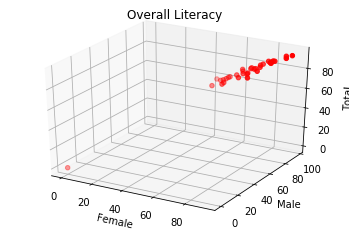

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Female_Literacy'], df2['Male_Literacy'], df2['Literacy_Rate'], c='r', marker = 'o')
ax.set_xlabel('Female')
ax.set_ylabel('Male')
ax.set_zlabel('Total')
plt.title('Overall Literacy')
plt.show()

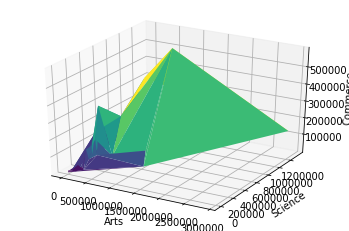

In [0]:
# Make Plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df2['Arts_Students'], df2['Science_Students'], df2['Commerce_Students'],cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('Arts')
ax.set_ylabel('Science')
ax.set_zlabel('Commerce')
plt.show()


